# Simulated Annealing, Local Beam Search

## Import Libraries

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time
from itertools import permutations
import random

## Helper functions and Classes

In [139]:
# Coordinates of the cities
coordinates = np.array([[1, 2], [1, 4], [2, 6], [7, 3], [8, 1], [8, 12], 
[13, 24], [15, 16], [20, 5], [18, 4], [21, 22]])

# Calculate the Euclidean distance between two cities
def distance(city1, city2):
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

# Calculate the total distance of a path
def total_distance(path):
    return sum(distance(coordinates[path[i - 1]], coordinates[path[i]]) for i in range(len(path)))

# Show path
def visualize_path(path):
    G = nx.Graph()
    G.add_nodes_from(path)
    G.add_edges_from((path[i - 1], path[i]) for i in range(len(path)))
    nx.draw(G, coordinates, with_labels=True)
    plt.show()

## Hill Climbing

In [140]:
def hill_climbing():
    time_complexity = 0
    space_complexity = 0
    # start with random solution
    path = np.random.permutation(len(coordinates))
    while True:
        time_complexity += 1
        distances = [total_distance(np.concatenate((path[:i], path[i:i+2][::-1], path[i+2:]))) for i in range(len(path) - 1)]
        space_complexity = max(space_complexity, len(distances))  # update space complexity
        if min(distances) >= total_distance(path):
            # if no improvement
            return path, time_complexity,space_complexity
        # Swap two cities to get a shorter path
        i = distances.index(min(distances))
        path = np.concatenate((path[:i], path[i:i+2][::-1], path[i+2:]))

## Hill Climbing Variants

### First Choice Hill Climbing

In [141]:
def first_choice_hill_climbing():
    time_complexity = 0
    space_complexity = 0
    # start with random solution
    path = np.random.permutation(len(coordinates))
    while True:
        time_complexity += 1
        i = np.random.randint(0, len(coordinates) - 1)
        new_path = np.concatenate((path[:i], path[i:i+2][::-1], path[i+2:]))
        space_complexity = max(space_complexity, len(new_path))  
        if total_distance(new_path) < total_distance(path):
            path = new_path
        else:
            # if no improvement
            return path,time_complexity,space_complexity

### Random Restart Hill Climbing

In [142]:
def random_restart_hill_climbing():
    time_complexity = 0
    space_complexity = 0
    best_path = np.random.permutation(len(coordinates))
    for _ in range(100):  # Perform 100 restarts
        path = np.random.permutation(len(coordinates))
        while True:
            time_complexity += 1
            distances = [total_distance(np.concatenate((path[:i], path[i:i+2][::-1], path[i+2:]))) for i in range(len(path) - 1)]
            space_complexity = max(space_complexity, len(distances))  
            if min(distances) >= total_distance(path):
                # if no improvement
                break
            # Swap two cities to get a shorter path
            i = distances.index(min(distances))
            path = np.concatenate((path[:i], path[i:i+2][::-1], path[i+2:]))
        if total_distance(path) < total_distance(best_path):
            best_path = path
    return best_path, time_complexity ,space_complexity

### Stochastic Hill Climbing

In [143]:
def stochastic_hill_climbing():
    time_complexity = 0
    space_complexity = 0
    path = np.random.permutation(len(coordinates)) # random path
    while True:
        time_complexity += 1
        neighbors = [np.concatenate((path[:i], path[i:i+2][::-1], path[i+2:])) for i in range(len(path) - 1)]
        space_complexity = max(space_complexity, len(neighbors))  
        distances = [total_distance(neighbor) for neighbor in neighbors]
        if min(distances) >= total_distance(path):
            # if no improvement
            return path,time_complexity,space_complexity
        # Select a neighbor randomly, with probability proportional to the improvement it provides
        probabilities = [max(0, total_distance(path) - distance) for distance in distances]
        total_probability = sum(probabilities)
        probabilities = [probability / total_probability for probability in probabilities]
        path = neighbors[np.random.choice(len(neighbors), p=probabilities)]

## Simulated Annealing

In [144]:
def simulated_annealing():
    time_complexity = 0
    space_complexity = 0
    path = np.random.permutation(len(coordinates)) # random path
    T = len(coordinates)
    while T > 0.01:
        time_complexity += 1
        i = np.random.randint(0, len(coordinates) - 1)
        new_path = np.concatenate((path[:i], path[i:i+2][::-1], path[i+2:]))
        space_complexity = max(space_complexity, len(new_path)) 
        delta = total_distance(new_path) - total_distance(path)
        if delta < 0 or np.random.rand() < np.exp(-delta / T):
            path = new_path
        T *= 0.99
    return path, time_complexity,space_complexity

## Local Beam Search

In [145]:
def local_beam_search():
    time_complexity = 0
    space_complexity = 0
    k = 10
    # start with k random solutions
    paths = [np.random.permutation(len(coordinates)) for _ in range(k)]
    while True:
        time_complexity +=1
        new_paths = []
        for path in paths:
            for i in range(len(path) - 1):
                new_paths.append(np.concatenate((path[:i], path[i:i+2][::-1], path[i+2:])))
        space_complexity = max(space_complexity, len(new_paths))
        paths = sorted(new_paths, key=total_distance)[:k]
        if total_distance(paths[0]) >= total_distance(paths[1]):
            # if no improvement
            return paths[0],time_complexity,space_complexity

## Run Experiments

hill_climbing took 0.0 seconds and found a path with total distance 105.47217695433663
hill_climbing has a time complexity of 4
hill_climbing has a space complexity of 10


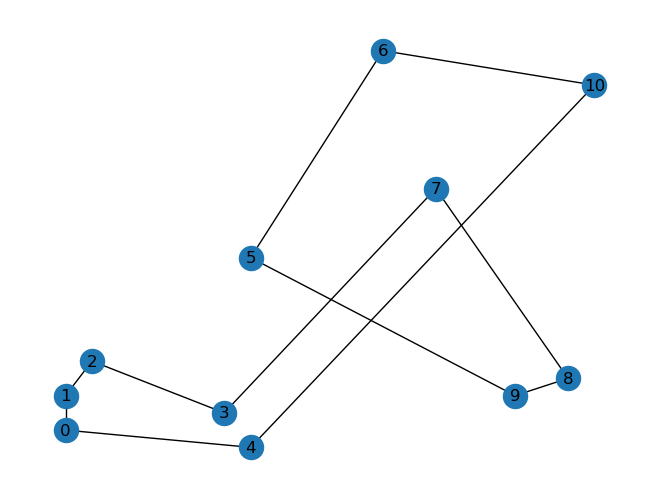

first_choice_hill_climbing took 0.0 seconds and found a path with total distance 164.92111964665577
first_choice_hill_climbing has a time complexity of 1
first_choice_hill_climbing has a space complexity of 11


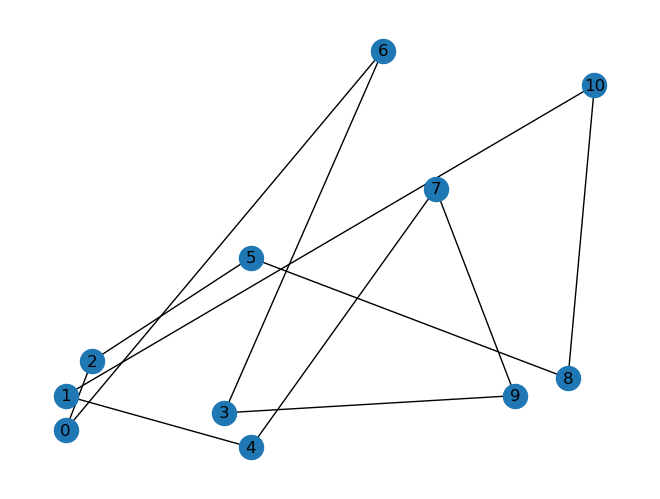

random_restart_hill_climbing took 0.17836809158325195 seconds and found a path with total distance 75.3006209626423
random_restart_hill_climbing has a time complexity of 527
random_restart_hill_climbing has a space complexity of 10


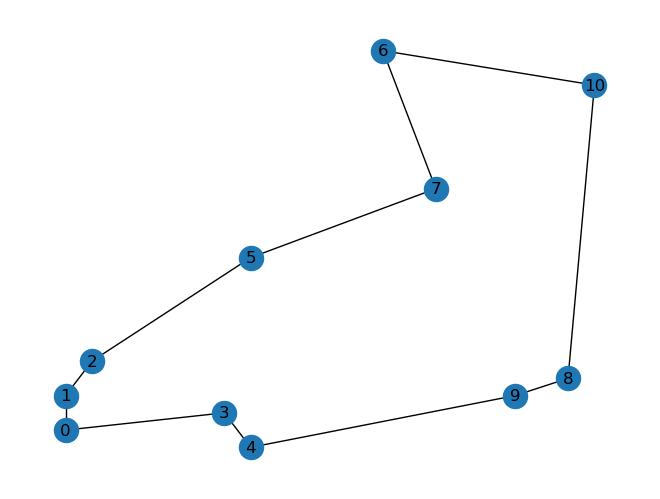

stochastic_hill_climbing took 0.0 seconds and found a path with total distance 104.34245838416889
stochastic_hill_climbing has a time complexity of 7
stochastic_hill_climbing has a space complexity of 10


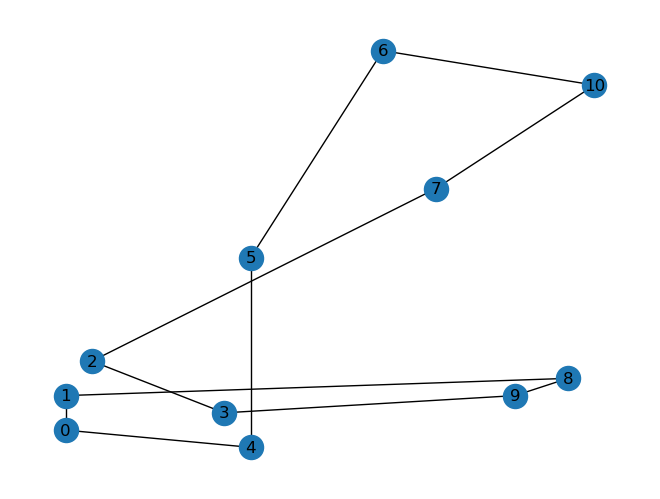

simulated_annealing took 0.046736955642700195 seconds and found a path with total distance 92.3866647203256
simulated_annealing has a time complexity of 697
simulated_annealing has a space complexity of 11


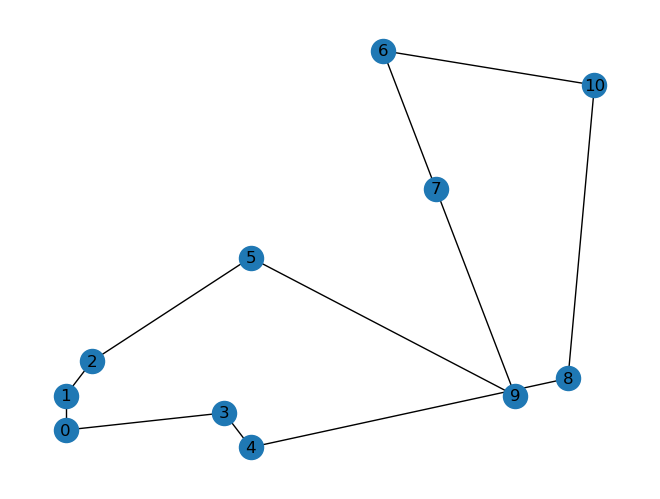

local_beam_search took 0.02069091796875 seconds and found a path with total distance 92.6429156339995
local_beam_search has a time complexity of 5
local_beam_search has a space complexity of 100


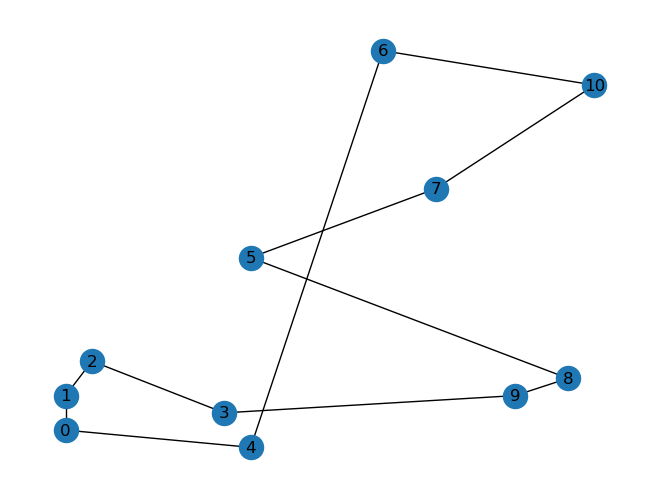

In [146]:
for algorithm in [hill_climbing, first_choice_hill_climbing, random_restart_hill_climbing, stochastic_hill_climbing,simulated_annealing,local_beam_search]:
    start_time = time.time()
    path, time_complexity, space_complexity = algorithm()
    end_time = time.time()
    print(f"{algorithm.__name__} took {end_time - start_time} seconds and found a path with total distance {total_distance(path)}")
    print(f"{algorithm.__name__} has a time complexity of {time_complexity}")
    print(f"{algorithm.__name__} has a space complexity of {space_complexity}")
    visualize_path(path)